In [1]:
import pandas as pd

In [4]:
train_df = pd.read_csv('./input/train.csv')
train_df.head().T

,0,1,2,3,4
PassengerId,0001_01,0002_01,0003_01,0003_02,0004_01
HomePlanet,Europa,Earth,Europa,Europa,Earth
CryoSleep,False,False,False,False,False
Cabin,B/0/P,F/0/S,A/0/S,A/0/S,F/1/S
Destination,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e
Age,39.0,24.0,58.0,33.0,16.0
VIP,False,False,True,False,False
RoomService,0.0,109.0,43.0,0.0,303.0
FoodCourt,0.0,9.0,3576.0,1283.0,70.0
ShoppingMall,0.0,25.0,0.0,371.0,151.0


In [5]:
submission_df = pd.read_csv('./input/sample_submission.csv')
submission_df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [7]:
print(len(train_df))
train_df.info()

8693
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
# 데이터 피처 요약표 
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

resumetable(train_df)

데이터셋 형상 : (8693, 14)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,PassengerId,object,0,8693,0001_01,0002_01,0003_01
1,HomePlanet,object,201,3,Europa,Earth,Europa
2,CryoSleep,object,217,2,False,False,False
3,Cabin,object,199,6560,B/0/P,F/0/S,A/0/S
4,Destination,object,182,3,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e
5,Age,float64,179,80,39.0,24.0,58.0
6,VIP,object,203,2,False,False,True
7,RoomService,float64,181,1273,0.0,109.0,43.0
8,FoodCourt,float64,183,1507,0.0,9.0,3576.0
9,ShoppingMall,float64,208,1115,0.0,25.0,0.0


<AxesSubplot:>

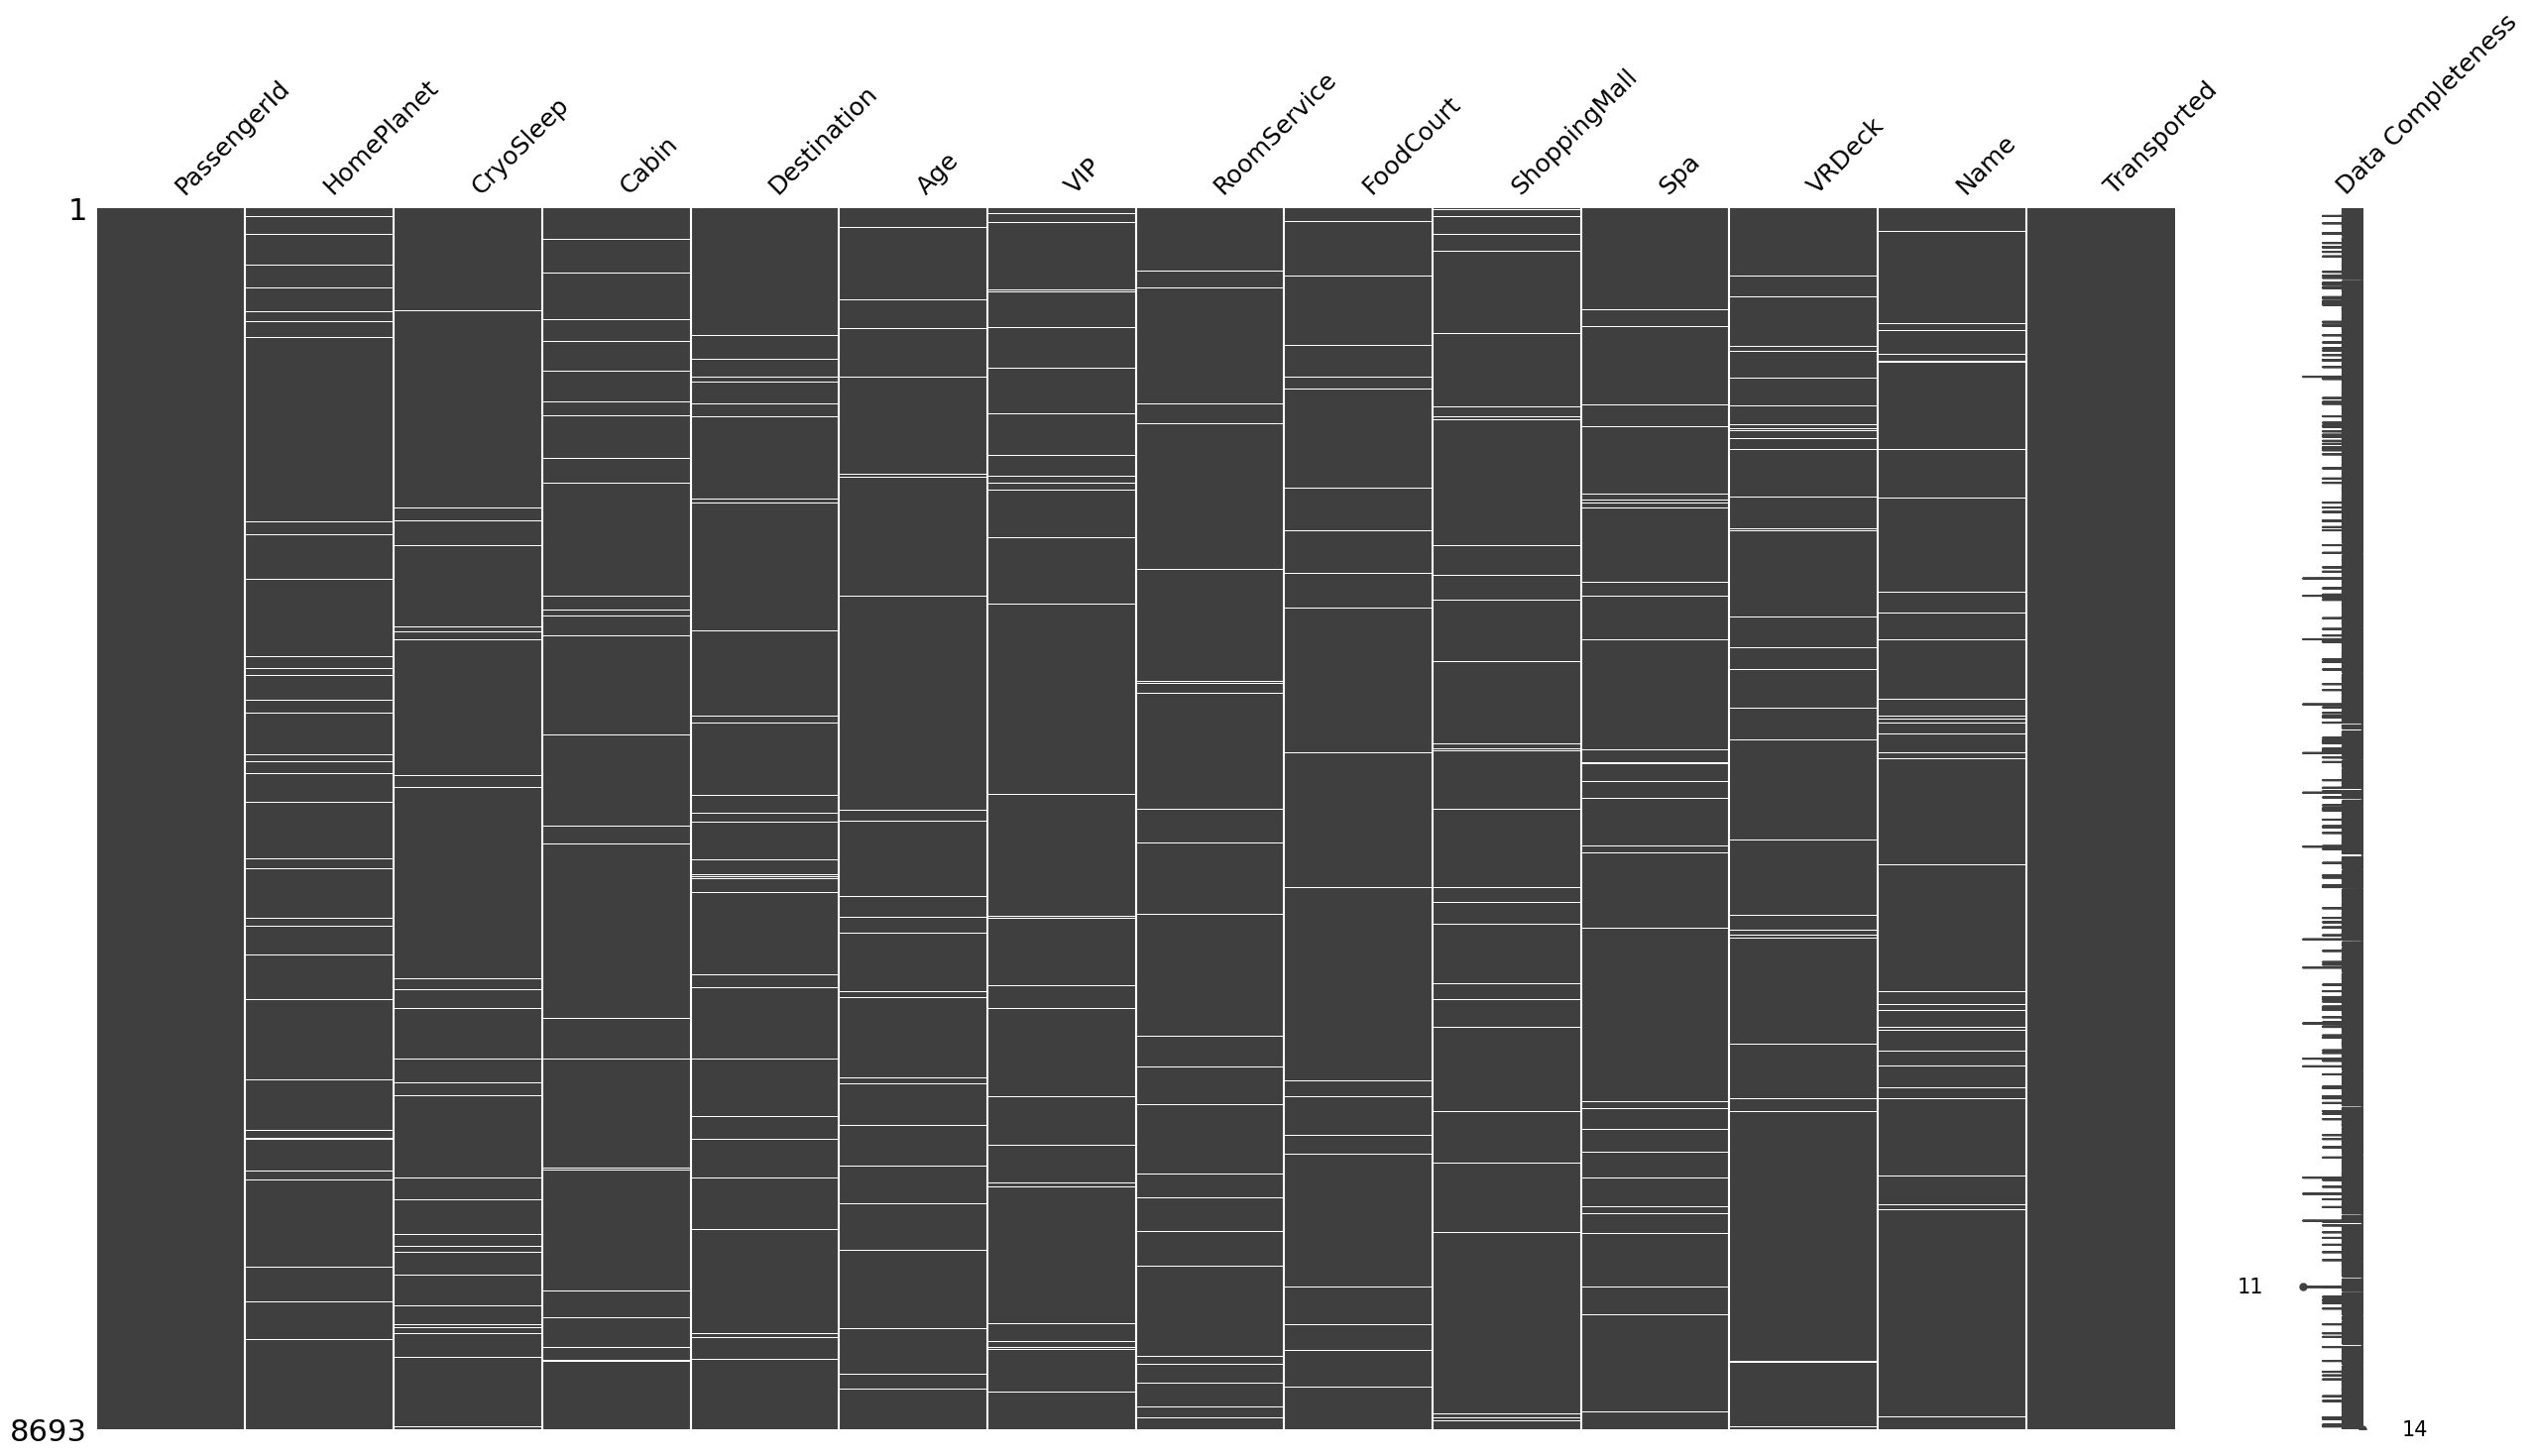

In [59]:
import missingno as msno
msno.matrix(train_df,labels=[train_df.columns],figsize=(30,16),fontsize=18)

Text(0.5, 1.0, 'Target Distribution')

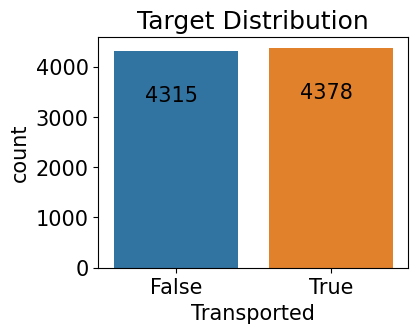

In [17]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 타깃값 분포 확인
mpl.rc('font', size=15)
plt.figure(figsize= (4,3))


# 타깃값 분포 카운트플롯
ax = sns.countplot(x='Transported', data=train_df)

# 막대 위에 카운트 수 표시
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.2, p.get_height() -1000))

ax.set_title('Target Distribution')



In [29]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() - 3 # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height / total_size * 100
        
        # (X, y) 좌표에 텍스트 입력
        ax.text(
            x=left_coord + width/2.0, # x축위치
            y=height + total_size*0.001, # y축위치
            s=f'{percent: 1.1f}%', # 입력 텍스트 
            ha='center' # 가운데 정렬
            )

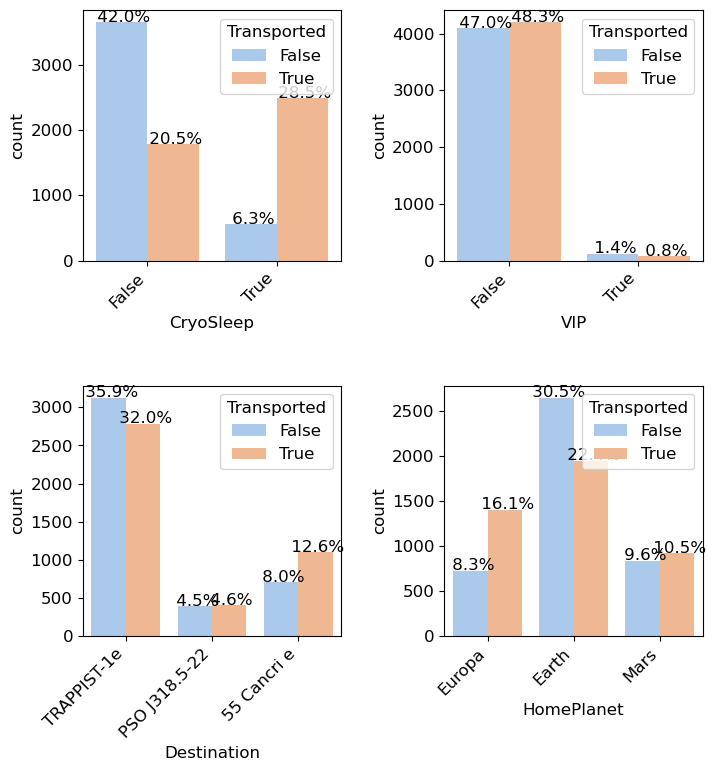

In [39]:
# 이진 피처 : Crosyleep, VIP
# 삼진 피처 : Destination,HomePlanet
# 이진 삼진 피처별 타겟값 분포 확인

import matplotlib.gridspec as gridspec # 여러 그래프 격자 형태로 배치
# 3행 2열 틀 (Figure) 준비

mpl.rc('font', size=12)
grid = gridspec.GridSpec(3,2) # 그래프 (서브플롯) 3행2열로 배치
plt.figure(figsize=(8,13)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.5) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['CryoSleep', 'VIP', 'Destination', 'HomePlanet'] # 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train_df,
                  hue='Transported',
                  palette='pastel',
                  ax=ax
                  ),

    # ax.set_title(feature,pad=20) # 그래프 제목 설정
    write_percent(ax, len(train_df)) # 비율 표시
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [48]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck 분석

def find_not_int(df, feature_name):
    cnt = 0
    for tmp in train_df[feature_name]:
        if not tmp.is_integer():
            cnt +=1
            
    nan_value_num = df[feature_name].isnull().sum()   
    print(f'{feature_name} 결측값 갯수: {nan_value_num} // 정수가 아닌값의 갯수: {cnt}')
    print()
    
find_not_int(train_df, 'RoomService')
find_not_int(train_df, 'FoodCourt')
find_not_int(train_df, 'ShoppingMall')
find_not_int(train_df, 'Spa')
find_not_int(train_df, 'VRDeck')

RoomService 결측값 갯수: 181 // 정수가 아닌값의 갯수: 181

FoodCourt 결측값 갯수: 183 // 정수가 아닌값의 갯수: 183

ShoppingMall 결측값 갯수: 208 // 정수가 아닌값의 갯수: 208

Spa 결측값 갯수: 183 // 정수가 아닌값의 갯수: 183

VRDeck 결측값 갯수: 188 // 정수가 아닌값의 갯수: 188



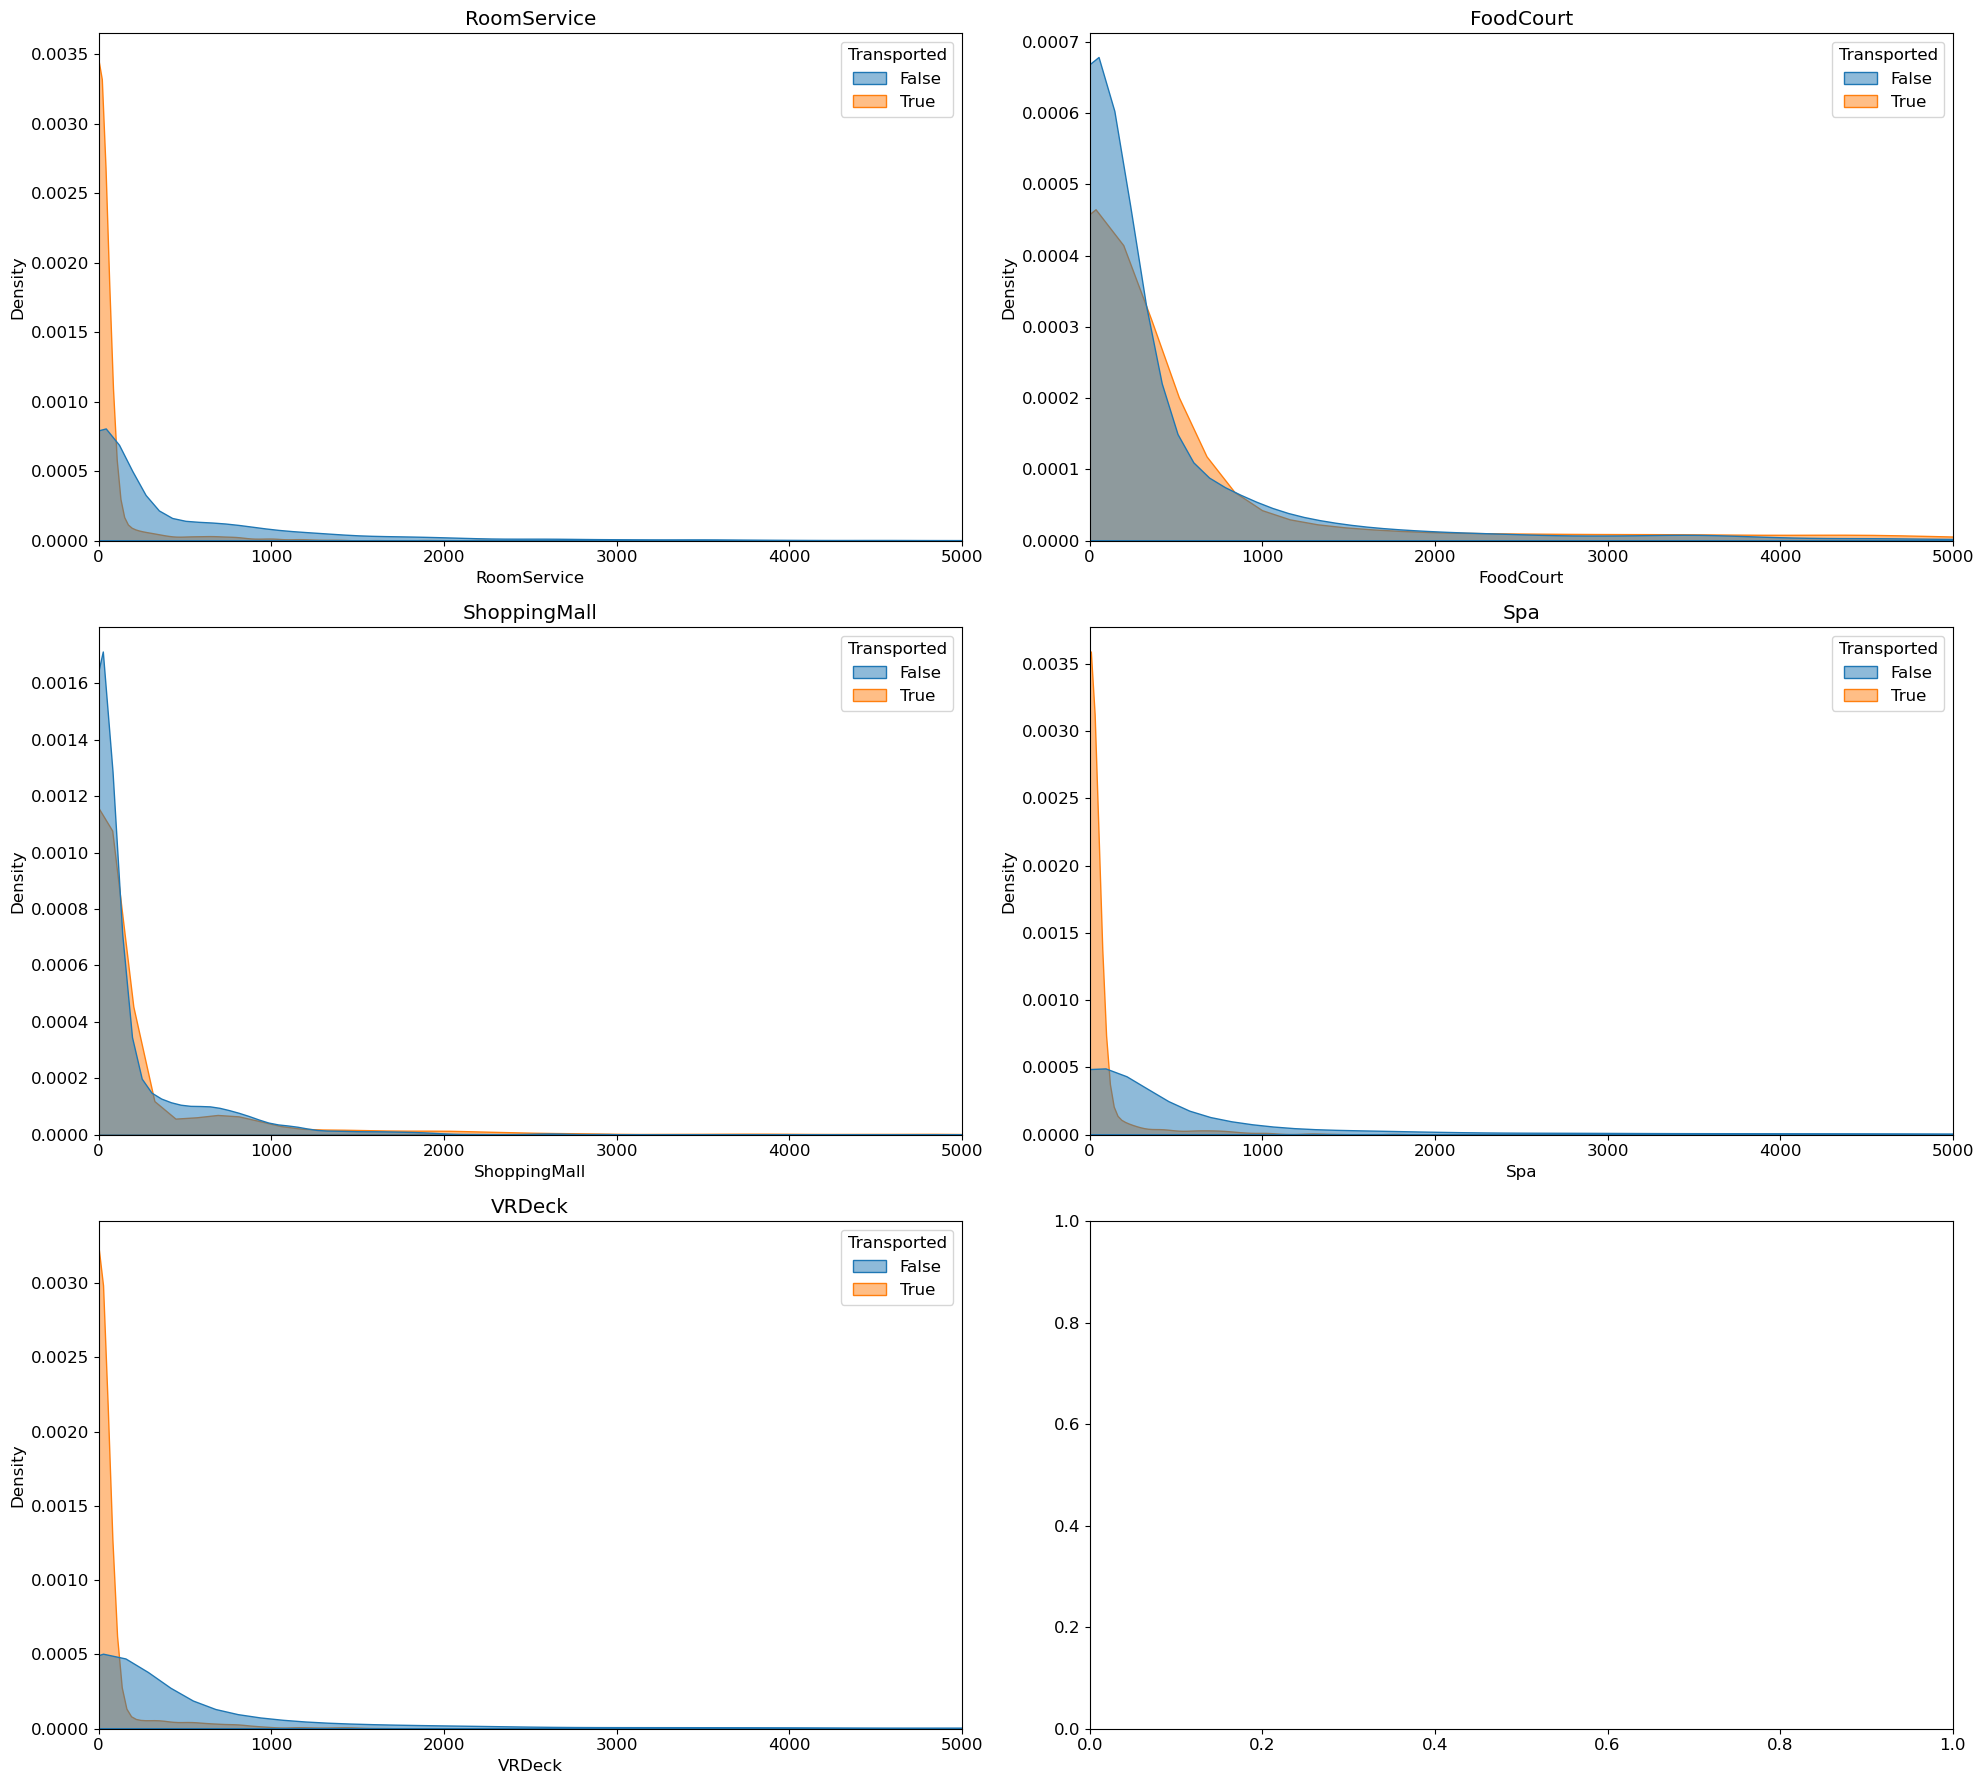

In [70]:
discrete_features = [ "RoomService" , "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ]
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,18))

for i, feature in enumerate(discrete_features):
    row = i // 2
    col = i % 2
    sns.kdeplot(data=train_df, x=feature, hue="Transported", fill=True, alpha=.5, ax=axs[row][col])
    axs[row][col].set_xlim(0, 5000)
    axs[row][col].set_title(feature)

plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Htmap of Numercial Data')]

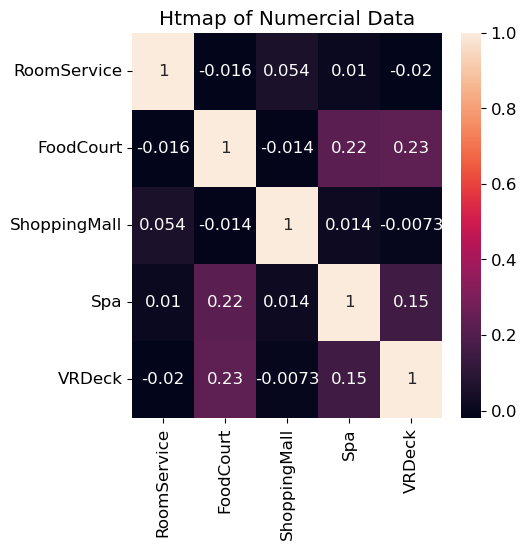

In [57]:
corrMat = train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.heatmap(corrMat, annot=True)
ax.set(title='Htmap of Numercial Data')

In [73]:
# group_id
train_df['Passenger_Group_ID'] = train_df['PassengerId'].apply(lambda x: int(x.split('_')[0]))
train_df['Passenger_Group_ID'].unique()

array([   1,    2,    3, ..., 9278, 9279, 9280], dtype=int64)

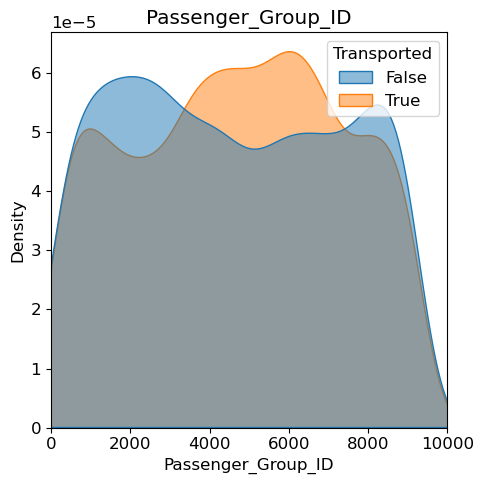

In [78]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

sns.kdeplot(data=train_df, x='Passenger_Group_ID', hue='Transported', fill=True, alpha=.5, ax=axs)
axs.set_xlim(0, 10000)
axs.set_title('Passenger_Group_ID')

plt.tight_layout()
plt.show()

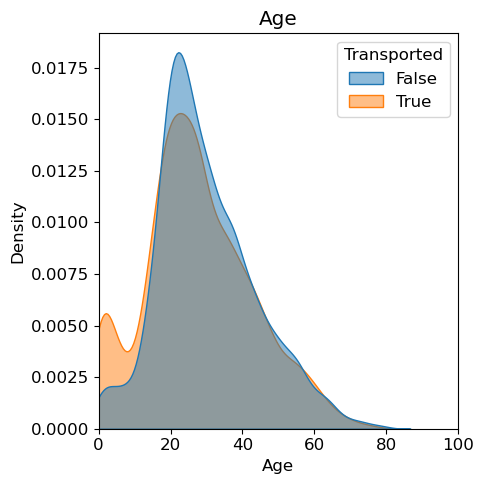

In [134]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

sns.kdeplot(data=train_df, x='Age', hue='Transported', fill=True, alpha=.5, ax=axs)
axs.set_xlim(0, 100)
axs.set_title('Age')

plt.tight_layout()
plt.show()

In [90]:
all_name_seperated = []
for tmp_name in train_df['Name']:
    tmp_name = str(tmp_name)
    names = tmp_name.split()
    all_name_seperated += names

all_name_seperated = list(set(all_name_seperated))
print(f"이름 사전갯수 : {len(all_name_seperated)}")

이름 사전갯수 : 4891


In [95]:
name_dictionary = {}

for tmp_name in all_name_seperated:
    name_dictionary[tmp_name] = 0

# 각 이름별 Transported 될시 +1 해줌 
for idx, tmp_name in enumerate(train_df['Name']):
    tmp_name = str(tmp_name)
    names = tmp_name.split()
    for name in names:
        if train_df['Transported'][idx] == True:
            name_dictionary[name] += 1

C:\Users\user\AppData\Local\Temp\ipykernel_20928\230225787.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys, rotation=90)


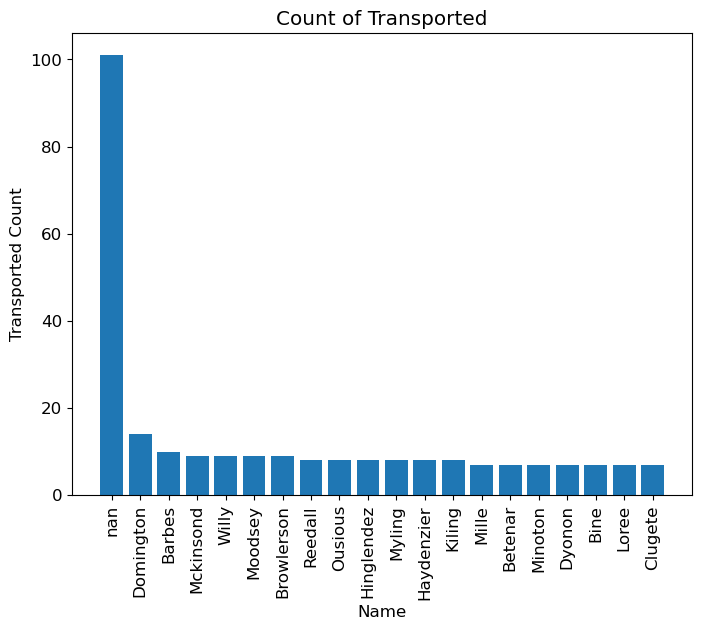

In [100]:
# value 값이 높은 순으로 정렬
sorted_dict = {k: v for k, v in sorted(name_dictionary.items(), key=lambda item: item[1], reverse=True)}

# x, y 값 추출
keys = list(sorted_dict.keys())[:20]
values = list(sorted_dict.values())[:20]

# 막대 그래프 시각화
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(keys, values)
ax.set_xlabel('Name')
ax.set_ylabel('Transported Count')
ax.set_title('Count of Transported')
ax.set_xticklabels(keys, rotation=90)

plt.show()

In [130]:
deck_list = []
num_list = []
side_list = []

for tmp_cabin in train_df['Cabin']:
    tmp_cabin = str(tmp_cabin)
    if tmp_cabin == 'nan':
        deck_list.append(None)
        num_list.append(None)
        side_list.append(None)
    else:
        tmp_cabin_str = str(tmp_cabin).split('/')
        deck_list.append(tmp_cabin_str[0])
        num_list.append(int(tmp_cabin_str[1]))
        side_list.append(tmp_cabin_str[2])

train_df['Cabin_Deck'] = deck_list
train_df['Cabin_Num'] = num_list
train_df['Cabin_Side'] = side_list

In [131]:
print(train_df['Cabin_Deck'].unique())
print(train_df['Cabin_Side'].unique())
print(train_df['Cabin_Num'].unique())

['B' 'F' 'A' 'G' None 'E' 'D' 'C' 'T']
['P' 'S' None]
[0.000e+00 1.000e+00 2.000e+00 ... 1.892e+03 1.893e+03 1.894e+03]


In [127]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['Transported'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x 축은 공유하고 y 축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values,
                        color='black', # 포인트플롯 색상
                        legend=False # 범례 미표시
                        ) # 포인트플롯 순서
    
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target Ratio(%)')

def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(12,5)):
    plt.figure(figsize=size) # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3)
        
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab =get_crosstab(df, feature) # 교차분석표 생성
        
        # ax축에 대한 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)
        
        write_percent(ax, len(df))
        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        ax.set_title(f'{feature} Distribution') # 그래프 제목 생성

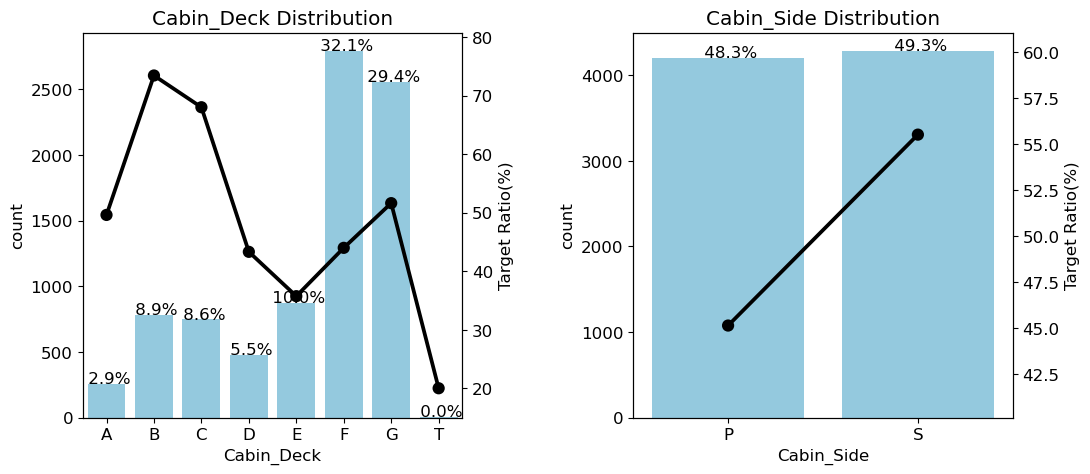

In [128]:
nom_features = ['Cabin_Deck', 'Cabin_Side']
plot_cat_dist_with_true_ratio(train_df, nom_features, num_rows=1, num_cols=2)

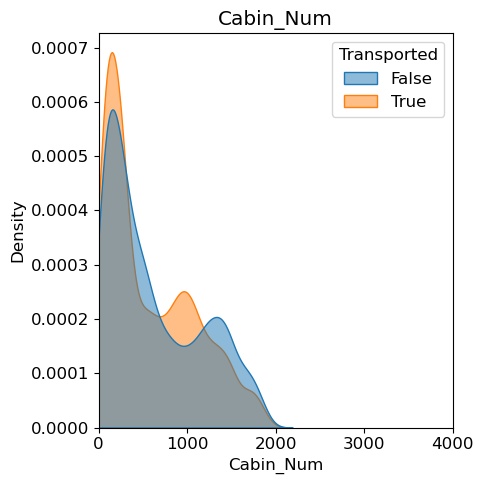

In [133]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

sns.kdeplot(data=train_df, x='Cabin_Num', hue='Transported', fill=True, alpha=.5, ax=axs)
axs.set_xlim(0, 4000)
axs.set_title('Cabin_Num')

plt.tight_layout()
plt.show()